In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [2]:
plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "serif"

In [3]:
df = pd.read_csv("results/analyzed_models.csv")
display(df.sort_values("r").iloc[::-1])

,rho,nu,zeta,eta,gamma,c,oc,oo,nc,no,y,r,h,g
824,5,7,0.1,1.0,0.984913,0.182296,0.007749,0.115111,0.017998,0.859143,0.795682,0.889085,0.987957,0.197888
705,8,10,0.1,1.0,0.992475,0.130213,0.004874,0.125734,0.010624,0.858768,0.806968,0.888896,0.987815,0.196561
374,9,7,0.1,0.8,0.988096,0.187948,0.020747,0.204599,0.025372,0.749281,0.750389,0.885467,0.983898,0.248900
6814,1,4,0.1,1.0,0.990530,0.262552,0.004624,0.055993,0.019623,0.919760,0.819164,0.881486,0.989838,0.178560
8105,4,10,0.1,1.0,0.993042,0.132661,0.002500,0.058118,0.007999,0.931384,0.833016,0.881350,0.990626,0.168750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,10,1,0.5,1.0,0.184991,1.000000,1.000000,0.000000,0.000000,0.000000,0.002355,0.006079,0.985148,0.124181
1356,10,1,0.3,0.3,0.286421,1.000000,1.000000,0.000000,0.000000,0.000000,0.004788,0.006005,0.981181,0.130329
4011,10,1,0.7,0.8,0.175928,1.000000,1.000000,0.000000,0.000000,0.000000,0.009794,0.000590,0.982979,0.137543
1644,10,1,0.3,0.6,0.305662,0.947368,0.994626,0.000750,0.003875,0.000750,0.180826,0.000343,0.978876,0.314421


nu,1,2,3,4,5,6,7,8,9,10
rho,,,,,,,,,,
10,0.000343,0.343330,0.375850,0.389254,0.362631,0.455090,0.463149,0.480614,0.469042,0.457274
9,0.051006,0.347069,0.329455,0.394035,0.394869,0.457971,0.466338,0.470382,0.504048,0.449523
8,0.000334,0.323913,0.318397,0.400973,0.378941,0.433836,0.444043,0.489455,0.506802,0.506887
7,0.287400,0.341807,0.391340,0.432520,0.443341,0.462456,0.422991,0.515540,0.456995,0.538723
6,0.337325,0.307884,0.383991,0.418736,0.451590,0.485583,0.439116,0.515488,0.470037,0.517312
5,0.300125,0.368965,0.409433,0.480439,0.425208,0.454815,0.498606,0.486621,0.474286,0.504825
4,0.341471,0.375426,0.428058,0.422989,0.474092,0.488326,0.486376,0.449300,0.486338,0.462040
3,0.372158,0.382186,0.390914,0.428955,0.453507,0.497879,0.514364,0.449205,0.519499,0.522838
2,0.371663,0.390377,0.418721,0.482103,0.463531,0.465272,0.479802,0.485342,0.505801,0.490561


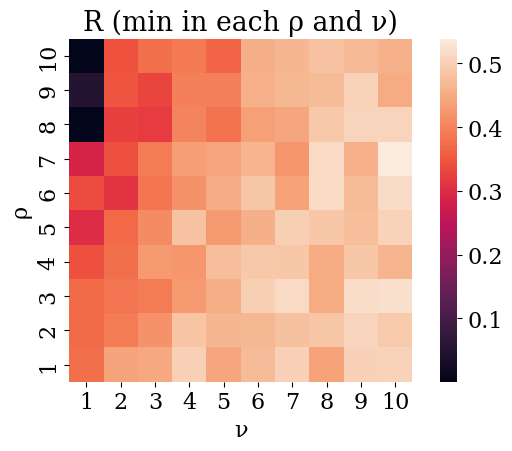

nu,1,2,3,4,5,6,7,8,9,10
rho,,,,,,,,,,
10,0.525713,0.643259,0.741232,0.796750,0.818487,0.835780,0.855742,0.847269,0.875176,0.869767
9,0.569905,0.683984,0.771701,0.826471,0.871265,0.832436,0.885467,0.845589,0.845294,0.880572
8,0.578937,0.702547,0.773927,0.838999,0.840310,0.850349,0.864573,0.848442,0.862384,0.888896
7,0.593532,0.729240,0.840027,0.842502,0.832122,0.810429,0.844800,0.856465,0.848257,0.857908
6,0.610240,0.750375,0.795675,0.857060,0.859622,0.830724,0.829594,0.861855,0.874123,0.872917
5,0.659246,0.751117,0.833317,0.877363,0.842174,0.867710,0.889085,0.847168,0.877643,0.832413
4,0.641116,0.787344,0.810610,0.847252,0.839916,0.841394,0.853780,0.856029,0.864026,0.881350
3,0.689286,0.809433,0.828276,0.875245,0.877224,0.860379,0.860756,0.876696,0.840704,0.861637
2,0.776853,0.840941,0.868651,0.825460,0.870722,0.878534,0.870209,0.865036,0.873025,0.847243


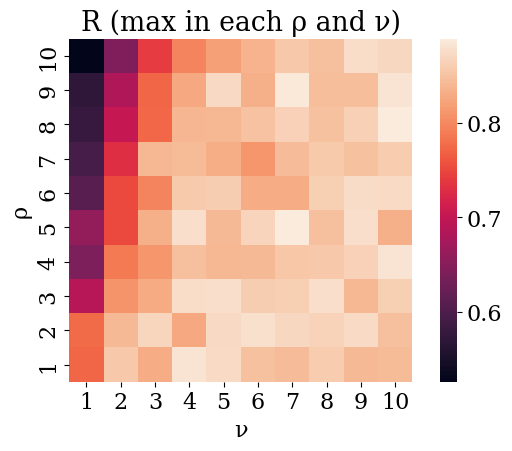

nu,1,2,3,4,5,6,7,8,9,10
rho,,,,,,,,,,
10,0.124181,0.444834,0.391311,0.342736,0.307484,0.266579,0.249183,0.237278,0.223906,0.212395
9,0.174112,0.432123,0.389618,0.333556,0.282617,0.260999,0.242385,0.225740,0.211599,0.199949
8,0.198991,0.433339,0.374382,0.304290,0.272614,0.237571,0.230048,0.216364,0.202564,0.196561
7,0.393053,0.416201,0.343423,0.299944,0.265505,0.239288,0.219375,0.204491,0.195772,0.186916
6,0.413739,0.413605,0.320351,0.281462,0.238760,0.216744,0.204227,0.195983,0.190230,0.185975
5,0.423878,0.377236,0.301346,0.259258,0.234795,0.209365,0.197888,0.192762,0.186240,0.177658
4,0.437728,0.355270,0.277575,0.245342,0.214685,0.197232,0.184543,0.178497,0.171892,0.168750
3,0.429998,0.324207,0.255462,0.218463,0.193049,0.187394,0.174754,0.175128,0.170118,0.166900
2,0.392134,0.293879,0.220482,0.205967,0.183396,0.179636,0.169668,0.164066,0.160476,0.160381


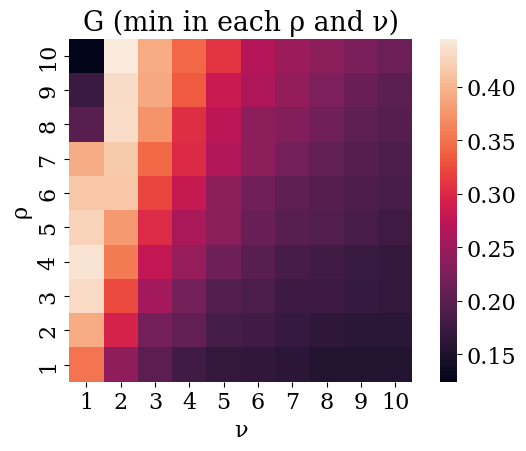

nu,1,2,3,4,5,6,7,8,9,10
rho,,,,,,,,,,
10,0.600099,0.588938,0.643089,0.619435,0.611684,0.591509,0.579720,0.564770,0.545699,0.531001
9,0.643475,0.625497,0.622195,0.625299,0.607386,0.589560,0.573516,0.550790,0.531828,0.522928
8,0.642485,0.601487,0.634438,0.616491,0.608504,0.597206,0.563814,0.552187,0.527136,0.523322
7,0.604271,0.619567,0.632794,0.607297,0.594818,0.570357,0.556762,0.531428,0.527936,0.503246
6,0.630826,0.616391,0.632507,0.607128,0.589895,0.565213,0.541790,0.521579,0.502775,0.486566
5,0.627072,0.609661,0.632853,0.603261,0.575941,0.559727,0.529857,0.515177,0.496055,0.478292
4,0.572585,0.622901,0.617419,0.587721,0.562018,0.538910,0.517595,0.498105,0.479406,0.463721
3,0.604751,0.615061,0.596953,0.583518,0.548899,0.520527,0.504448,0.479614,0.465811,0.447216
2,0.645600,0.608605,0.583236,0.560705,0.522161,0.500890,0.484840,0.461485,0.451282,0.436007


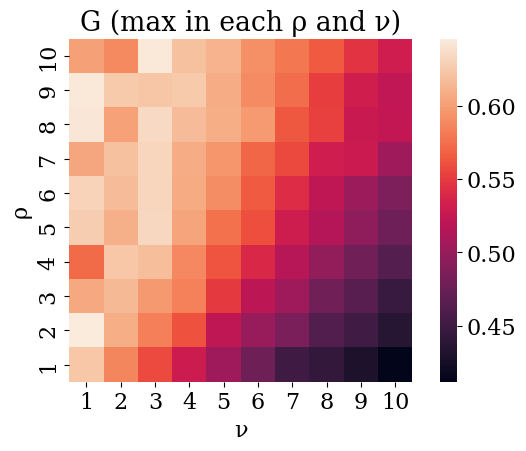

nu,1,2,3,4,5,6,7,8,9,10
rho,,,,,,,,,,
10,0.950856,0.951693,0.955658,0.958377,0.962164,0.962718,0.961736,0.965228,0.967139,0.966794
9,0.950609,0.949787,0.956171,0.958358,0.962901,0.963335,0.965237,0.963741,0.966106,0.966764
8,0.951461,0.952742,0.957297,0.959663,0.962814,0.962889,0.964867,0.965728,0.966070,0.966848
7,0.949351,0.953795,0.956871,0.961416,0.963071,0.964887,0.964076,0.965875,0.966582,0.967169
6,0.949372,0.954830,0.957177,0.961088,0.962428,0.963447,0.966655,0.965381,0.966676,0.965865
5,0.948135,0.955694,0.958241,0.961310,0.963782,0.962698,0.966121,0.964416,0.965233,0.965854
4,0.951522,0.957211,0.959079,0.962326,0.963269,0.964959,0.964634,0.966828,0.966477,0.965678
3,0.952763,0.957026,0.960725,0.964537,0.962341,0.966444,0.964197,0.966856,0.966698,0.964988
2,0.952272,0.960255,0.961330,0.963314,0.963743,0.966452,0.965041,0.965567,0.965934,0.966255


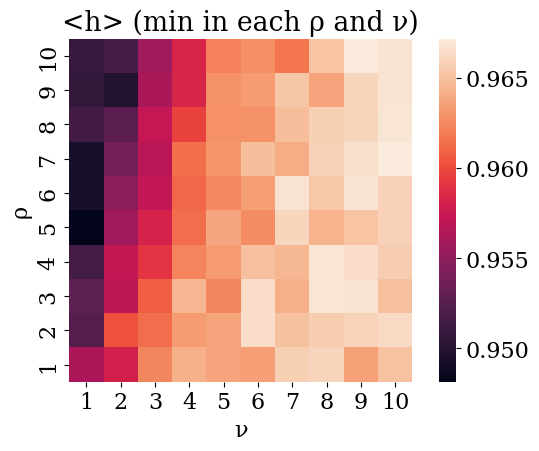

nu,1,2,3,4,5,6,7,8,9,10
rho,,,,,,,,,,
10,0.985148,0.964075,0.971863,0.976586,0.979881,0.982210,0.983649,0.985267,0.985983,0.986851
9,0.979439,0.965883,0.972876,0.977516,0.980857,0.983054,0.984812,0.985728,0.986541,0.987631
8,0.981827,0.967454,0.974702,0.978910,0.981702,0.983939,0.985460,0.986535,0.987265,0.988193
7,0.964009,0.969094,0.975600,0.979931,0.982956,0.984947,0.986240,0.987158,0.988336,0.989001
6,0.959417,0.970559,0.977457,0.981850,0.984070,0.985769,0.987023,0.988274,0.988732,0.989593
5,0.963410,0.972579,0.978888,0.982609,0.985750,0.986803,0.988046,0.988923,0.989841,0.990488
4,0.963433,0.974743,0.980469,0.984152,0.986770,0.988180,0.989123,0.989896,0.990334,0.990920
3,0.965908,0.977204,0.983018,0.986245,0.988042,0.989184,0.990076,0.990764,0.991191,0.991807
2,0.970413,0.980775,0.985660,0.987743,0.989553,0.990490,0.991108,0.991582,0.991981,0.992364


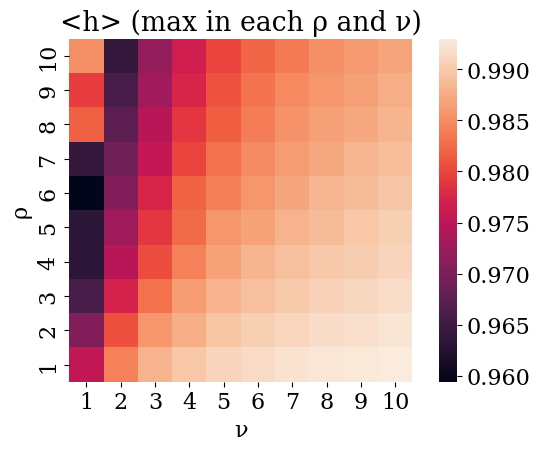

nu,1,2,3,4,5,6,7,8,9,10
rho,,,,,,,,,,
10,0.002355,0.368973,0.364804,0.360039,0.372560,0.406324,0.414532,0.441349,0.457637,0.471793
9,0.096703,0.369288,0.363243,0.378799,0.371704,0.411977,0.421165,0.437522,0.462338,0.486941
8,0.064893,0.356624,0.337187,0.385455,0.374972,0.422411,0.438340,0.459398,0.477477,0.502957
7,0.291041,0.344725,0.374323,0.352766,0.401570,0.395816,0.446581,0.457144,0.476087,0.494339
6,0.325752,0.329224,0.369453,0.380188,0.402341,0.436075,0.457041,0.493033,0.493704,0.520642
5,0.328623,0.368530,0.368473,0.403057,0.424639,0.454375,0.466659,0.503906,0.513192,0.548105
4,0.339141,0.356253,0.370222,0.414005,0.441990,0.479416,0.494470,0.511624,0.537065,0.552222
3,0.359204,0.366954,0.391228,0.419301,0.465524,0.486366,0.523471,0.550335,0.545796,0.587034
2,0.376763,0.373953,0.417971,0.453741,0.486151,0.514052,0.544384,0.559356,0.586873,0.605953


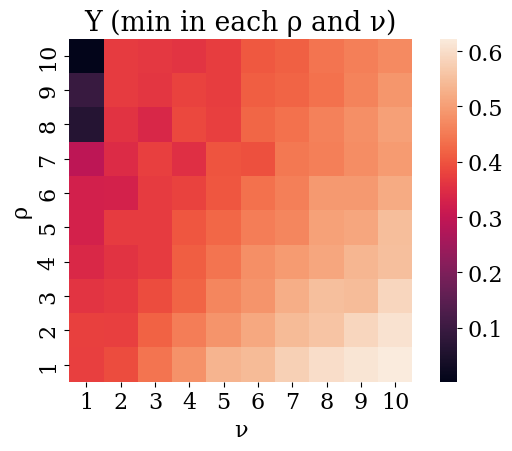

nu,1,2,3,4,5,6,7,8,9,10
rho,,,,,,,,,,
10,0.635111,0.576959,0.587921,0.634494,0.695030,0.731144,0.756811,0.775220,0.784489,0.787617
9,0.769435,0.541373,0.625741,0.670671,0.715240,0.742923,0.754960,0.773956,0.793001,0.799761
8,0.711224,0.558421,0.614982,0.682916,0.724316,0.748847,0.775477,0.775907,0.799929,0.806968
7,0.598748,0.551076,0.637265,0.706333,0.741082,0.764558,0.785986,0.791506,0.811333,0.808589
6,0.623960,0.578705,0.648388,0.714942,0.744872,0.782340,0.793679,0.808885,0.817538,0.826739
5,0.720022,0.605830,0.682973,0.739990,0.770887,0.795282,0.795682,0.805681,0.816276,0.824468
4,0.547364,0.613978,0.711417,0.765024,0.783103,0.801491,0.812026,0.822304,0.826053,0.833016
3,0.574056,0.657893,0.734213,0.780211,0.805471,0.816568,0.825449,0.833073,0.833818,0.835253
2,0.595191,0.703537,0.766172,0.810484,0.806943,0.828008,0.834397,0.834191,0.841983,0.847851


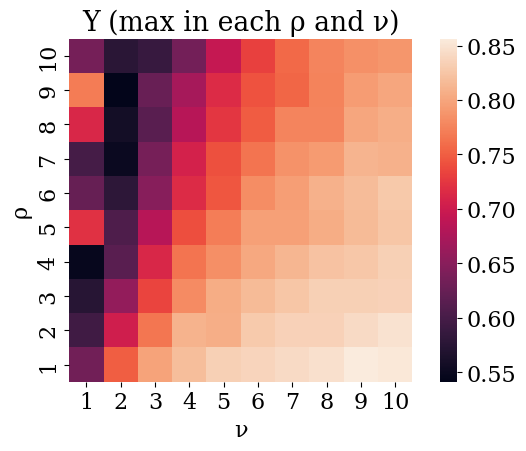

In [4]:
import os
import shutil

names = {
    "r": "R",
    "g": "G",
    "h": "<h>",
    "y": "Y",
}

out_dir = "results/imgs/novelty_ranges"

shutil.rmtree(out_dir, ignore_errors=True)
os.makedirs(out_dir, exist_ok=True)

for value in ["r", "g", "h", "y"]:
    for min_max in [min, max]:
        _data = df.pivot_table(
            index="rho",
            columns="nu",
            values=value,
            aggfunc=min_max,
        )[::-1]
        display(_data)
        sns.heatmap(_data, square=True)
        plt.title(f"{names[value]} ({min_max.__name__} in each ρ and ν)")
        plt.xlabel("ν")
        plt.ylabel("ρ")
        plt.tight_layout()
        plt.savefig(f"{out_dir}/{value}_{min_max.__name__}.png", dpi=100)
        plt.savefig(f"{out_dir}/{value}_{min_max.__name__}.pdf")
        plt.show()
        plt.close()


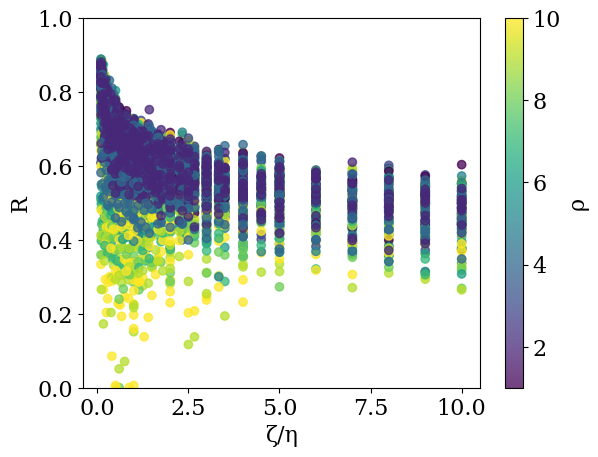

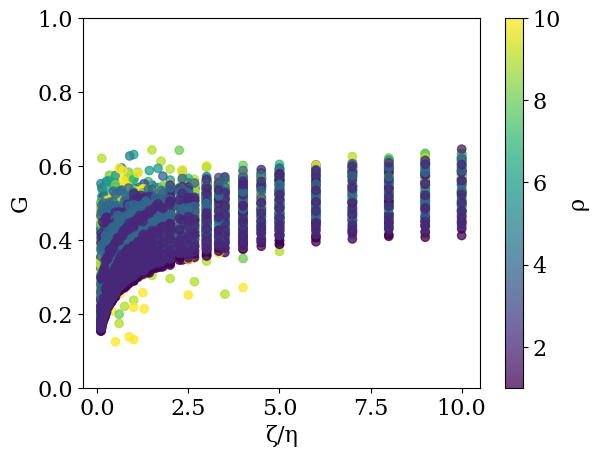

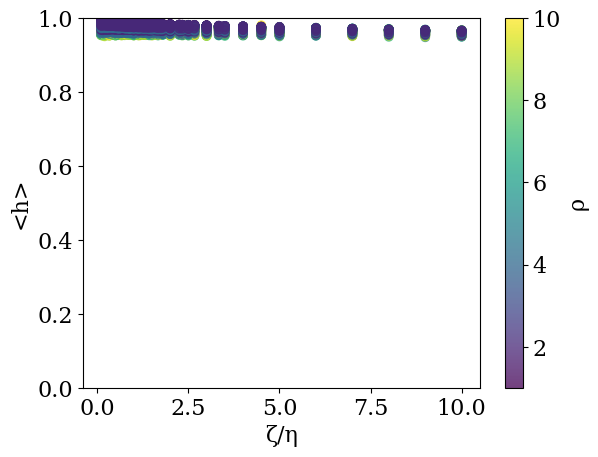

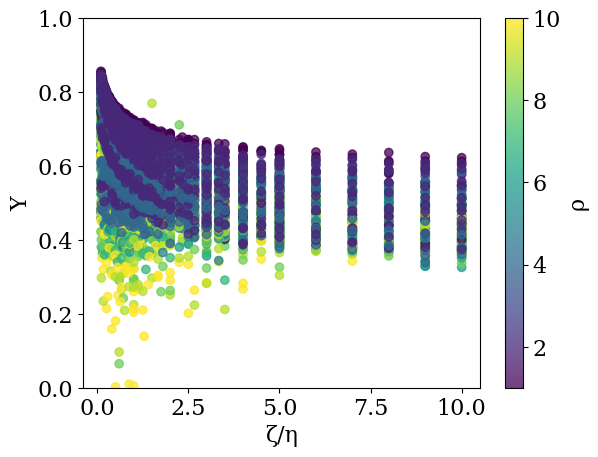

In [5]:
metrics_dict = {
    "r": "R",
    "g": "G",
    "h": "<h>",
    "y": "Y",
}

for metrics, label in metrics_dict.items():

    _data = df.copy()
    _data["ratio"] = _data["zeta"] / _data["eta"]

    cm: matplotlib.colors.ListedColormap = plt.cm.get_cmap() # type: ignore
    fig = plt.figure()
    ax = fig.add_subplot()

    mappable = ax.scatter(x=_data["ratio"], y=_data[metrics], c=_data["rho"], cmap=cm, alpha=0.75)
    cb = fig.colorbar(mappable, ax=ax)
    cb.set_label("ρ")

    plt.ylim(0, 1)
    plt.xlabel("ζ/η")
    plt.ylabel(label)
    plt.show()


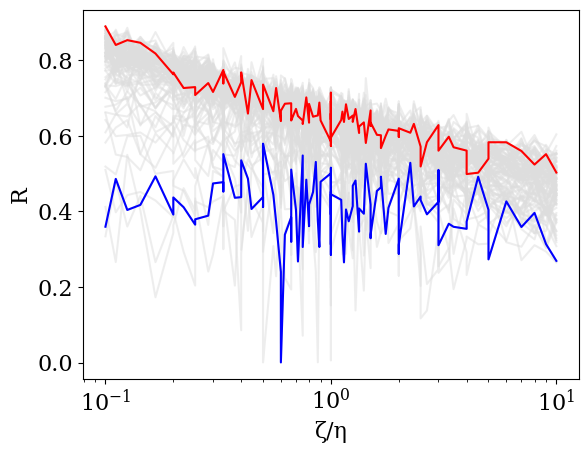

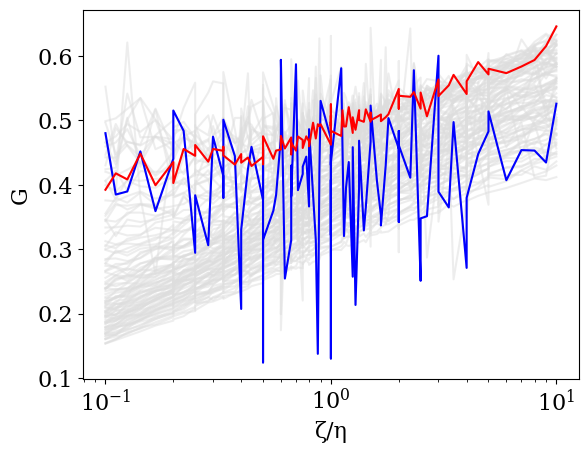

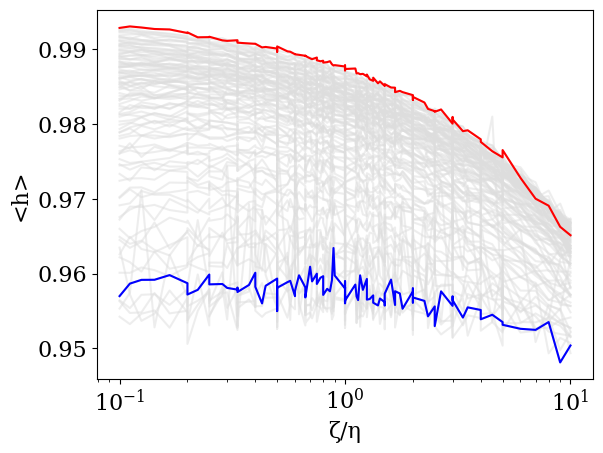

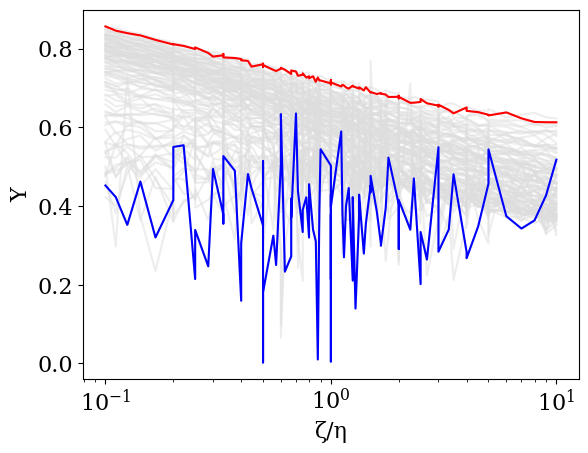

In [6]:
_data = df.copy()
_data["ratio"] = _data["zeta"] / _data["eta"]
_data = _data.sort_values("ratio")


metrics, metrics_label = list(metrics_dict.items())[0]

for metrics, metrics_label in metrics_dict.items():

    gd = _data.groupby(by=["rho", "nu"])
    for _, _df in gd:
        plt.plot(_df.ratio, _df[metrics], color="#DDDDDD", alpha=0.5)


    # 最小値を取る線をプロット
    min_row = _data.iloc[_data[metrics].argmin()]
    min_data = _data.loc[(_data.rho == min_row.rho) & (_data.nu == min_row.nu)]
    plt.plot(min_data.ratio, min_data[metrics], color="blue")

    # 最大値を取る線をプロット
    max_row = _data.iloc[_data[metrics].argmax()]
    max_data = _data.loc[(_data.rho == max_row.rho) & (_data.nu == max_row.nu)]
    plt.plot(max_data.ratio, max_data[metrics], color="red")

    plt.xlabel("ζ/η")
    plt.ylabel(metrics_label)
    plt.xscale("log")

    # plt.annotate(
    #     text="max",
    #     xy=(max_row.ratio, max_row[metrics]),  # type: ignore
    #     xytext=(max_row.ratio * 10**0.2, max_row[metrics]),  # type: ignore
    #     arrowprops=dict(arrowstyle="->"),
    # )
    # plt.annotate(
    #     text="min",
    #     xy=(min_row.ratio, min_row[metrics]),  # type: ignore
    #     xytext=(min_row.ratio * 10**0.2, min_row[metrics]),  # type: ignore
    #     arrowprops=dict(arrowstyle="->"),
    # )


    plt.show()
